In [63]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pyodbc

In [64]:
# Check my drivers
pyodbc.drivers()

['SQL Server',
 'PostgreSQL ANSI(x64)',
 'PostgreSQL Unicode(x64)',
 'Amazon Redshift (x64)',
 'SQL Server Native Client 11.0',
 'ODBC Driver 17 for SQL Server',
 'SQL Server Native Client RDA 11.0',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)']

In [65]:
# Connect to sql server
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-BV42F6ID\SQLEXPRESS;'
                      'Database=PortfolioProject;'
                      'Trusted_Connection=yes;')

In [66]:
# Select my query 
query = "SELECT * FROM MLBBeerPrices;"

In [67]:
# Read my query and view the dataset
df = pd.read_sql(query, conn)

df.head()

,Year,Team,Nickname,City,Price,Size,Price per Ounce
0,2013,Arizona Diamondbacks,Diamondbacks,Arizona,4,14,0.285714286
1,2013,Atlanta Braves,Braves,Atlanta,7.25,16,0.453125
2,2013,Baltimore Orioles,Orioles,Baltimore,6.75,18,0.375
3,2013,Boston Red Sox,Red Sox,Boston,7.25,12,0.604166667
4,2013,Chicago Cubs,Cubs,Chicago,7.25,16,0.453125


In [68]:
# Making a copy of the dataset
mlb_beer = df.copy()

mlb_beer

,Year,Team,Nickname,City,Price,Size,Price per Ounce
0,2013,Arizona Diamondbacks,Diamondbacks,Arizona,4,14,0.285714286
1,2013,Atlanta Braves,Braves,Atlanta,7.25,16,0.453125
2,2013,Baltimore Orioles,Orioles,Baltimore,6.75,18,0.375
3,2013,Boston Red Sox,Red Sox,Boston,7.25,12,0.604166667
4,2013,Chicago Cubs,Cubs,Chicago,7.25,16,0.453125
...,...,...,...,...,...,...,...
150,2018,Tampa Bay Rays,Rays,Tampa,5,12,0.416666667
151,2018,Texas Rangers,Rangers,Arlington,6,16,0.375
152,2018,Toronto Blue Jays,Blue Jays,Toronto,5.67,14,0.405
153,2018,Washington Nationals,Nationals,Washington,7,14,0.5


In [69]:
# Checking the data types
mlb_beer.dtypes

Year               object
Team               object
Nickname           object
City               object
Price              object
Size               object
Price per Ounce    object
dtype: object

In [70]:
# Converting certain columns to the appropriate data types
mlb_beer = mlb_beer.astype({"Year": 'int', "Price": 'float64', "Size": 'float64', "Price per Ounce": 'float64'})

mlb_beer

,Year,Team,Nickname,City,Price,Size,Price per Ounce
0,2013,Arizona Diamondbacks,Diamondbacks,Arizona,4.00,14.0,0.285714
1,2013,Atlanta Braves,Braves,Atlanta,7.25,16.0,0.453125
2,2013,Baltimore Orioles,Orioles,Baltimore,6.75,18.0,0.375000
3,2013,Boston Red Sox,Red Sox,Boston,7.25,12.0,0.604167
4,2013,Chicago Cubs,Cubs,Chicago,7.25,16.0,0.453125
...,...,...,...,...,...,...,...
150,2018,Tampa Bay Rays,Rays,Tampa,5.00,12.0,0.416667
151,2018,Texas Rangers,Rangers,Arlington,6.00,16.0,0.375000
152,2018,Toronto Blue Jays,Blue Jays,Toronto,5.67,14.0,0.405000
153,2018,Washington Nationals,Nationals,Washington,7.00,14.0,0.500000


In [71]:
# Count number of MLB teams
mlb_beer.Team.nunique()

31

In [72]:
# Selecting the rows that have MLB Average in the Team column
MLB_AVG = mlb_beer.loc[mlb_beer['Team'] == 'MLB Average']

MLB_AVG

,Year,Team,Nickname,City,Price,Size,Price per Ounce
30,2013,MLB Average,MLB Average,,6.094667,14.966667,0.407216
61,2014,MLB Average,MLB Average,,6.085667,14.766667,0.412122
92,2015,MLB Average,MLB Average,,5.980000,15.000000,0.398667
123,2016,MLB Average,MLB Average,,5.901333,14.700000,0.401451
154,2018,MLB Average,MLB Average,,5.980000,14.000000,0.427143


In [73]:
# Removed the rows that contain MLB Average in the Team column
updated_mlb_beer = mlb_beer.drop([30, 61, 92, 123, 154])

updated_mlb_beer

,Year,Team,Nickname,City,Price,Size,Price per Ounce
0,2013,Arizona Diamondbacks,Diamondbacks,Arizona,4.00,14.0,0.285714
1,2013,Atlanta Braves,Braves,Atlanta,7.25,16.0,0.453125
2,2013,Baltimore Orioles,Orioles,Baltimore,6.75,18.0,0.375000
3,2013,Boston Red Sox,Red Sox,Boston,7.25,12.0,0.604167
4,2013,Chicago Cubs,Cubs,Chicago,7.25,16.0,0.453125
...,...,...,...,...,...,...,...
149,2018,St. Louis Cardinals,Cardinals,St. Louis,5.00,12.0,0.416667
150,2018,Tampa Bay Rays,Rays,Tampa,5.00,12.0,0.416667
151,2018,Texas Rangers,Rangers,Arlington,6.00,16.0,0.375000
152,2018,Toronto Blue Jays,Blue Jays,Toronto,5.67,14.0,0.405000


In [74]:
# Printing all of the columns from the dataset
print(updated_mlb_beer.columns.tolist())

['Year', 'Team', 'Nickname', 'City', 'Price', 'Size', 'Price per Ounce']


In [75]:
# Created a new column and rounded it to 3 decimal points
updated_mlb_beer['Rounded_price_per_ounce'] = round(updated_mlb_beer['Price per Ounce'],3)

updated_mlb_beer

,Year,Team,Nickname,City,Price,Size,Price per Ounce,Rounded_price_per_ounce
0,2013,Arizona Diamondbacks,Diamondbacks,Arizona,4.00,14.0,0.285714,0.286
1,2013,Atlanta Braves,Braves,Atlanta,7.25,16.0,0.453125,0.453
2,2013,Baltimore Orioles,Orioles,Baltimore,6.75,18.0,0.375000,0.375
3,2013,Boston Red Sox,Red Sox,Boston,7.25,12.0,0.604167,0.604
4,2013,Chicago Cubs,Cubs,Chicago,7.25,16.0,0.453125,0.453
...,...,...,...,...,...,...,...,...
149,2018,St. Louis Cardinals,Cardinals,St. Louis,5.00,12.0,0.416667,0.417
150,2018,Tampa Bay Rays,Rays,Tampa,5.00,12.0,0.416667,0.417
151,2018,Texas Rangers,Rangers,Arlington,6.00,16.0,0.375000,0.375
152,2018,Toronto Blue Jays,Blue Jays,Toronto,5.67,14.0,0.405000,0.405


In [76]:
# Removing a column
updated_mlb_beer.drop('Price per Ounce', inplace=True, axis=1)

updated_mlb_beer

,Year,Team,Nickname,City,Price,Size,Rounded_price_per_ounce
0,2013,Arizona Diamondbacks,Diamondbacks,Arizona,4.00,14.0,0.286
1,2013,Atlanta Braves,Braves,Atlanta,7.25,16.0,0.453
2,2013,Baltimore Orioles,Orioles,Baltimore,6.75,18.0,0.375
3,2013,Boston Red Sox,Red Sox,Boston,7.25,12.0,0.604
4,2013,Chicago Cubs,Cubs,Chicago,7.25,16.0,0.453
...,...,...,...,...,...,...,...
149,2018,St. Louis Cardinals,Cardinals,St. Louis,5.00,12.0,0.417
150,2018,Tampa Bay Rays,Rays,Tampa,5.00,12.0,0.417
151,2018,Texas Rangers,Rangers,Arlington,6.00,16.0,0.375
152,2018,Toronto Blue Jays,Blue Jays,Toronto,5.67,14.0,0.405


In [77]:
# Filtering dataset by year
Beer_2013 = updated_mlb_beer.loc[updated_mlb_beer['Year'] == 2013]

Beer_2014 = updated_mlb_beer.loc[updated_mlb_beer['Year'] == 2014]

Beer_2015 = updated_mlb_beer.loc[updated_mlb_beer['Year'] == 2015]

Beer_2018 = updated_mlb_beer.loc[updated_mlb_beer['Year'] == 2018]


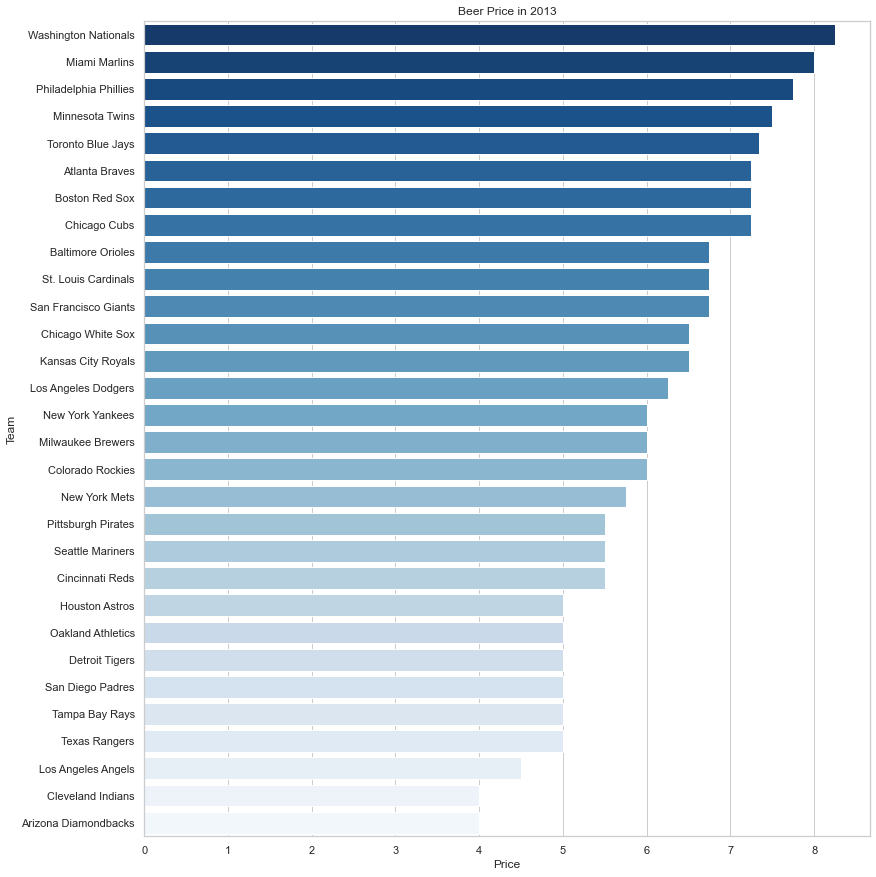

In [78]:
# Set the theme
sns.set_theme(style="whitegrid")

#Set the figure size
f, ax = plt.subplots(figsize=(13, 15))

# Reorder the dataset
Beer_2013_order = Beer_2013.sort_values(['Price'], ascending=False).reset_index(drop=True)

# Barplot created
ax = sns.barplot(x="Price", y="Team", data=Beer_2013_order, orient="h", palette="Blues_r").set(title="Beer Price in 2013")

In [79]:
# Finding the mean and median of beer price in 2013
mean_2013_price = Beer_2013['Price'].mean()
median_2013_price = Beer_2013['Price'].median()

# Printing the mean and median
print(f'Mean: {mean_2013_price}')
print(f'Median: {median_2013_price}')

Mean: 6.094666666666667
Median: 6.0


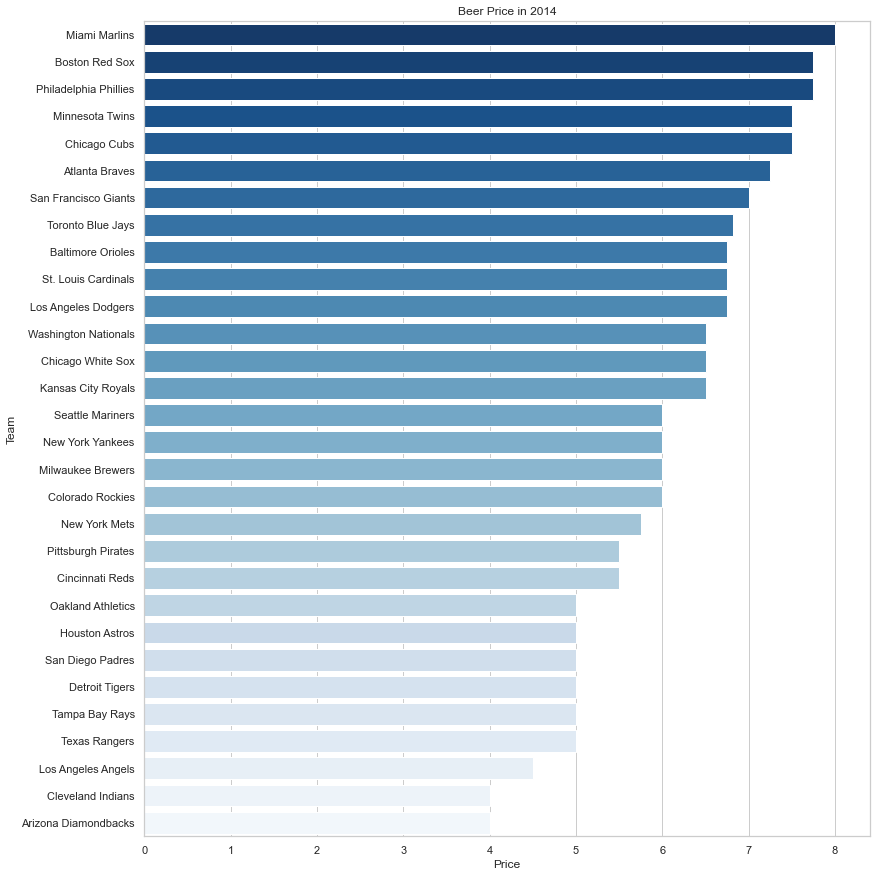

In [80]:
# Set the theme
sns.set_theme(style="whitegrid")

#Set the figure size
f, ax = plt.subplots(figsize=(13, 15))

# Reorder the dataset
Beer_2014_order = Beer_2014.sort_values(['Price'], ascending=False).reset_index(drop=True)

# Barplot created
ax = sns.barplot(x="Price", y="Team", data=Beer_2014_order, orient="h", palette="Blues_r").set(title="Beer Price in 2014")

In [81]:
# Finding the mean and median of beer price in 2014
mean_2014_price = Beer_2014['Price'].mean()
median_2014_price = Beer_2014['Price'].median()

# Printing the mean and median
print(f'Mean: {mean_2014_price}')
print(f'Median: {median_2014_price}')

Mean: 6.085666666666667
Median: 6.0


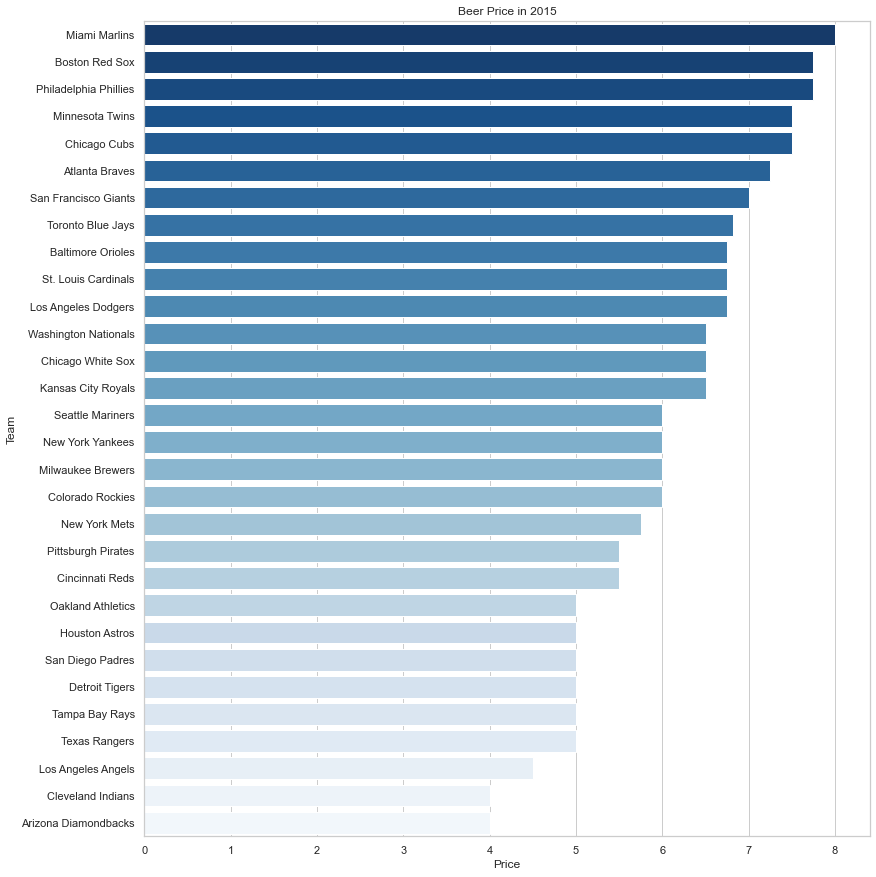

In [82]:
# Set the theme
sns.set_theme(style="whitegrid")

#Set the figure size
f, ax = plt.subplots(figsize=(13, 15))

# Reorder the dataset
Beer_2015_order = Beer_2015.sort_values(['Price'], ascending=False).reset_index(drop=True)

# Barplot created
ax = sns.barplot(x="Price", y="Team", data=Beer_2015_order, orient="h", palette="Blues_r").set(title="Beer Price in 2015")

In [83]:
# Finding the mean and median of beer price in 2015
mean_2015_price = Beer_2015['Price'].mean()
median_2015_price = Beer_2015['Price'].median()

# Printing the mean and median
print(f'Mean: {mean_2015_price}')
print(f'Median: {median_2015_price}')

Mean: 6.085666666666667
Median: 6.0


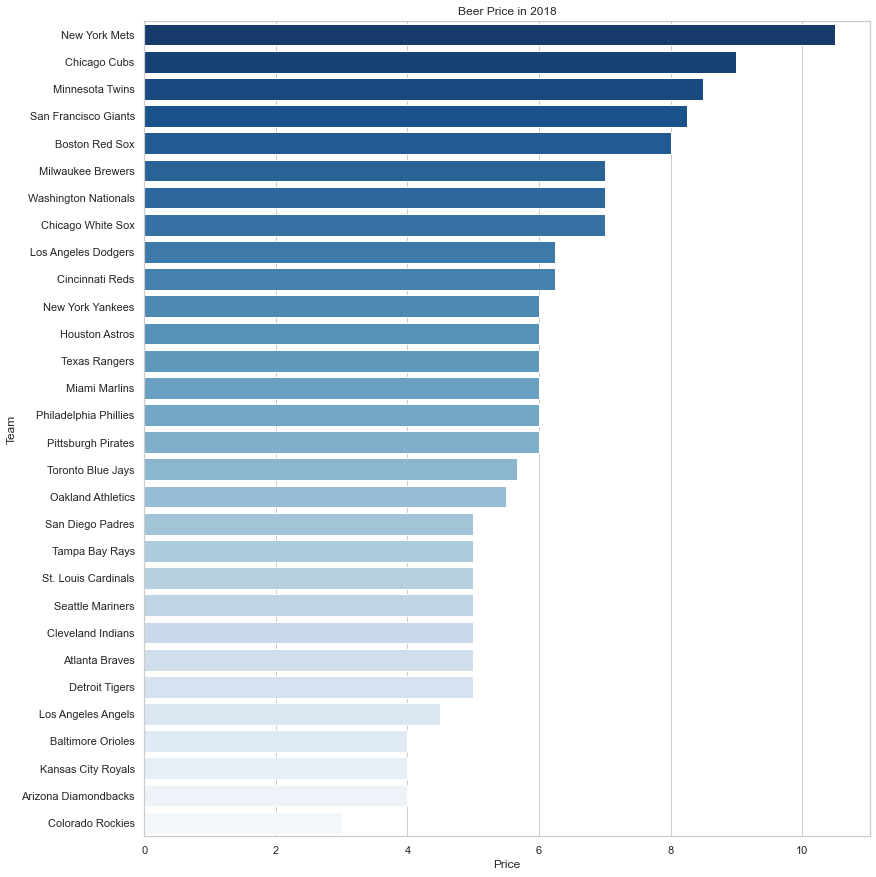

In [84]:
# Set the theme
sns.set_theme(style="whitegrid")

#Set the figure size
f, ax = plt.subplots(figsize=(13, 15))

# Reorder the dataset
Beer_2018_order = Beer_2018.sort_values(['Price'], ascending=False).reset_index(drop=True)

# Barplot created
ax = sns.barplot(x="Price", y="Team", data=Beer_2018_order, orient="h", palette="Blues_r").set(title="Beer Price in 2018")

In [85]:
# Finding the mean and median of beer price in 2018
mean_2018_price = Beer_2018['Price'].mean()
median_2018_price = Beer_2018['Price'].median()

# Printing mean and median
print(f'Mean: {mean_2018_price}')
print(f'Median: {median_2018_price}')

Mean: 5.980666666666666
Median: 6.0


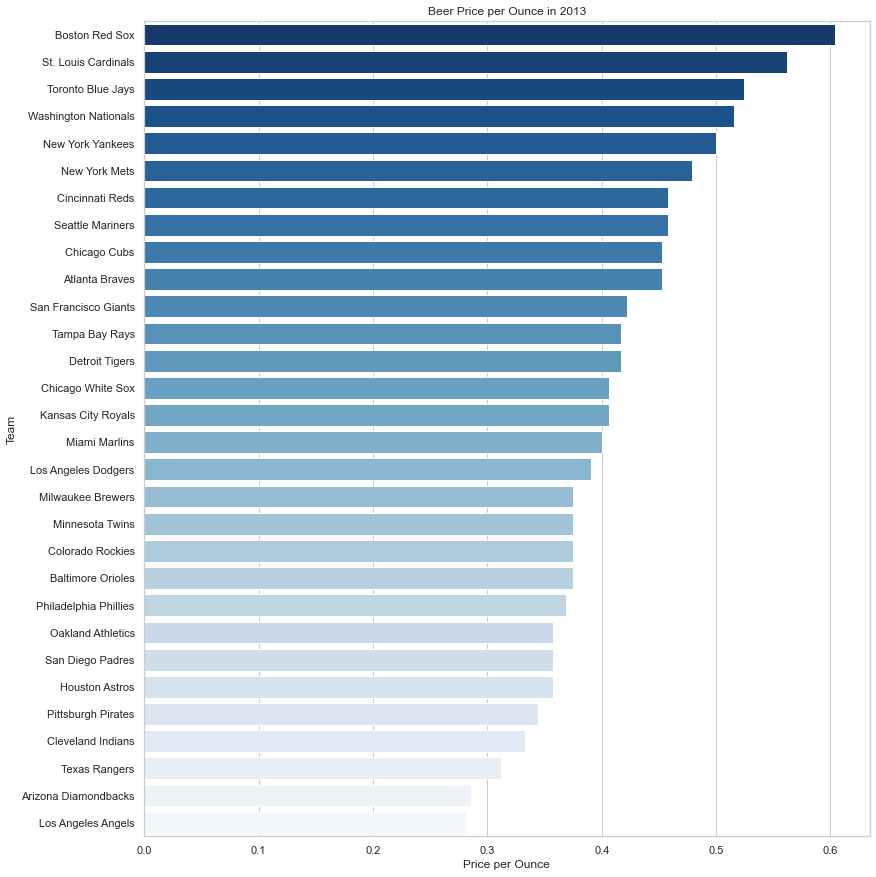

In [86]:
# Set the theme
sns.set_theme(style="whitegrid")

#Set the figure size
f, ax = plt.subplots(figsize=(13, 15))

# Reorder the dataset
Beer_2013_order_ounce = Beer_2013.sort_values(['Rounded_price_per_ounce'], ascending=False).reset_index(drop=True)

# Barplot created
ax = sns.barplot(x="Rounded_price_per_ounce", y="Team", data=Beer_2013_order_ounce, orient="h", palette="Blues_r").set(title="Beer Price per Ounce in 2013")

# Rename the x-axis label
plt.xlabel('Price per Ounce')

# Display barplot
plt.show()

In [87]:
# Finding the mean and median of beer price per ounce in 2013
mean_2013_price_ounce = Beer_2013['Rounded_price_per_ounce'].mean()
median_2013_price_ounce = Beer_2013['Rounded_price_per_ounce'].median()

# Printing mean and median
print(f'Mean: {mean_2013_price_ounce}')
print(f'Median: {median_2013_price_ounce}')

Mean: 0.4120666666666667
Median: 0.403


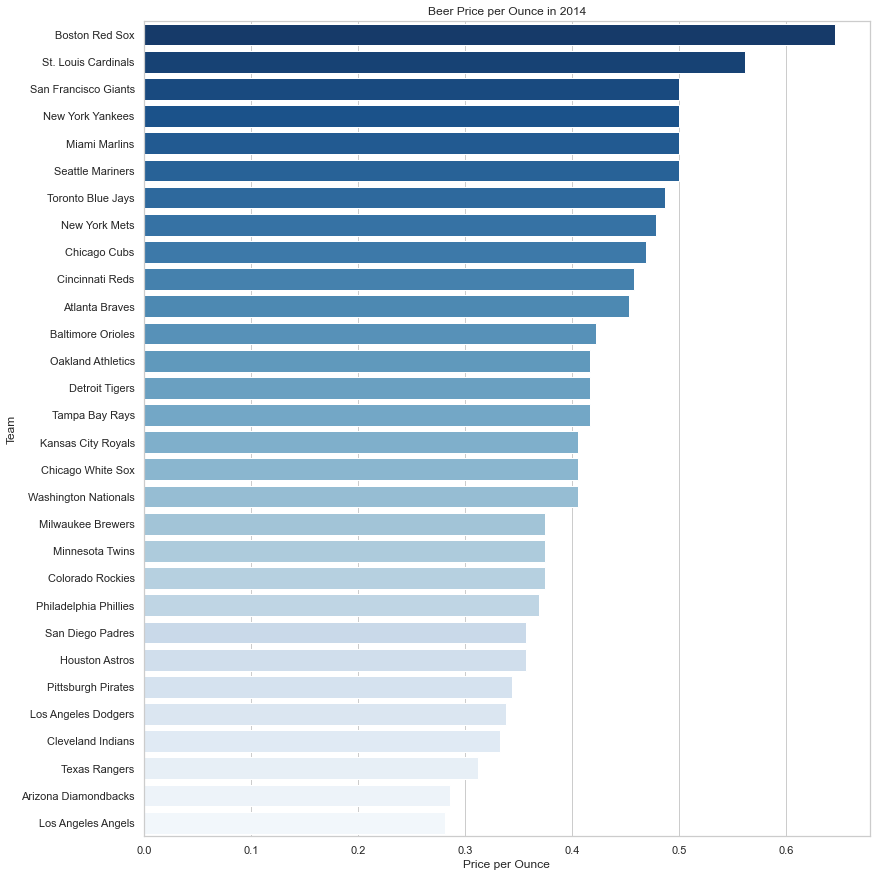

In [88]:
# Set the theme
sns.set_theme(style="whitegrid")

#Set the figure size
f, ax = plt.subplots(figsize=(13, 15))

# Reorder the dataset
Beer_2014_order_ounce = Beer_2014.sort_values(['Rounded_price_per_ounce'], ascending=False).reset_index(drop=True)

# Barplot created
ax = sns.barplot(x="Rounded_price_per_ounce", y="Team", data=Beer_2014_order_ounce, orient="h", palette="Blues_r").set(title="Beer Price per Ounce in 2014")

# Rename the x-axis label
plt.xlabel('Price per Ounce')

# Display barplot
plt.show()

In [89]:
# Finding the mean and median of beer price per ounce in 2014
mean_2014_price_ounce = Beer_2014['Rounded_price_per_ounce'].mean()
median_2014_price_ounce = Beer_2014['Rounded_price_per_ounce'].median()

# Printing mean and median
print(f'Mean: {mean_2014_price_ounce}')
print(f'Median: {median_2014_price_ounce}')

Mean: 0.4182333333333333
Median: 0.4115


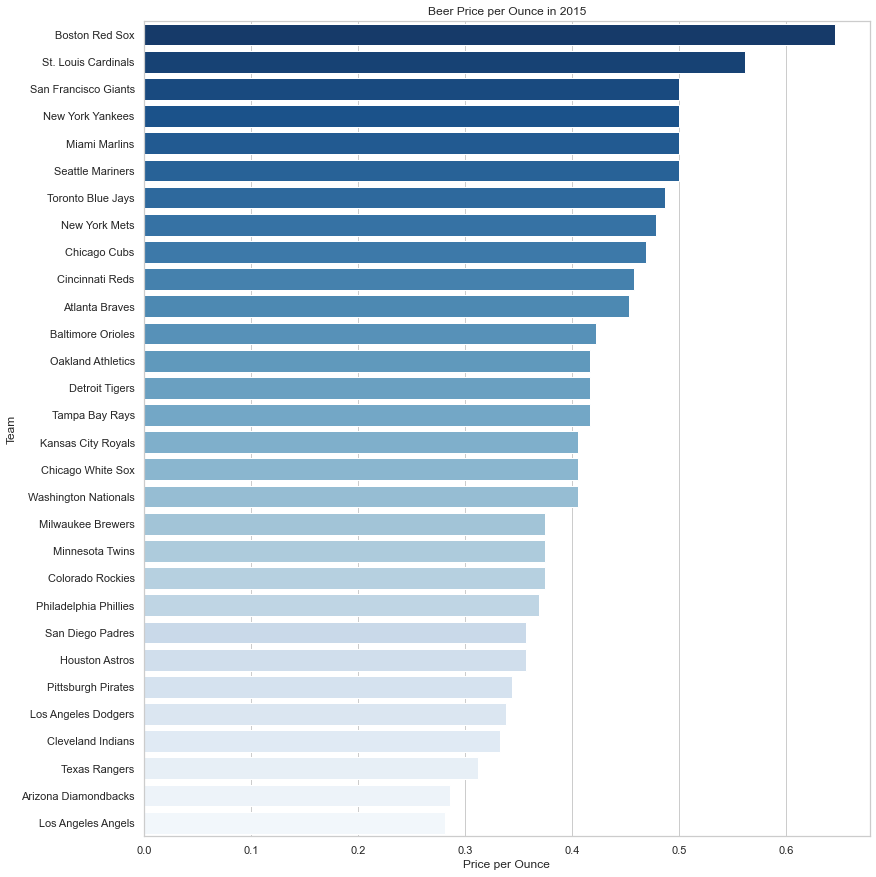

In [90]:
# Set the theme
sns.set_theme(style="whitegrid")

#Set the figure size
f, ax = plt.subplots(figsize=(13, 15))

# Reorder the dataset
Beer_2015_order_ounce = Beer_2015.sort_values(['Rounded_price_per_ounce'], ascending=False).reset_index(drop=True)

# Barplot created
ax = sns.barplot(x="Rounded_price_per_ounce", y="Team", data=Beer_2015_order_ounce, orient="h", palette="Blues_r").set(title="Beer Price per Ounce in 2015")

# Rename the x-axis label
plt.xlabel('Price per Ounce')

# Display barplot
plt.show()

In [91]:
# Finding the mean and median of beer price per ounce in 2015
mean_2015_price_ounce = Beer_2015['Rounded_price_per_ounce'].mean()
median_2015_price_ounce = Beer_2015['Rounded_price_per_ounce'].median()

# Printing mean and median
print(f'Mean: {mean_2015_price_ounce}')
print(f'Median: {median_2015_price_ounce}')

Mean: 0.4182333333333333
Median: 0.4115


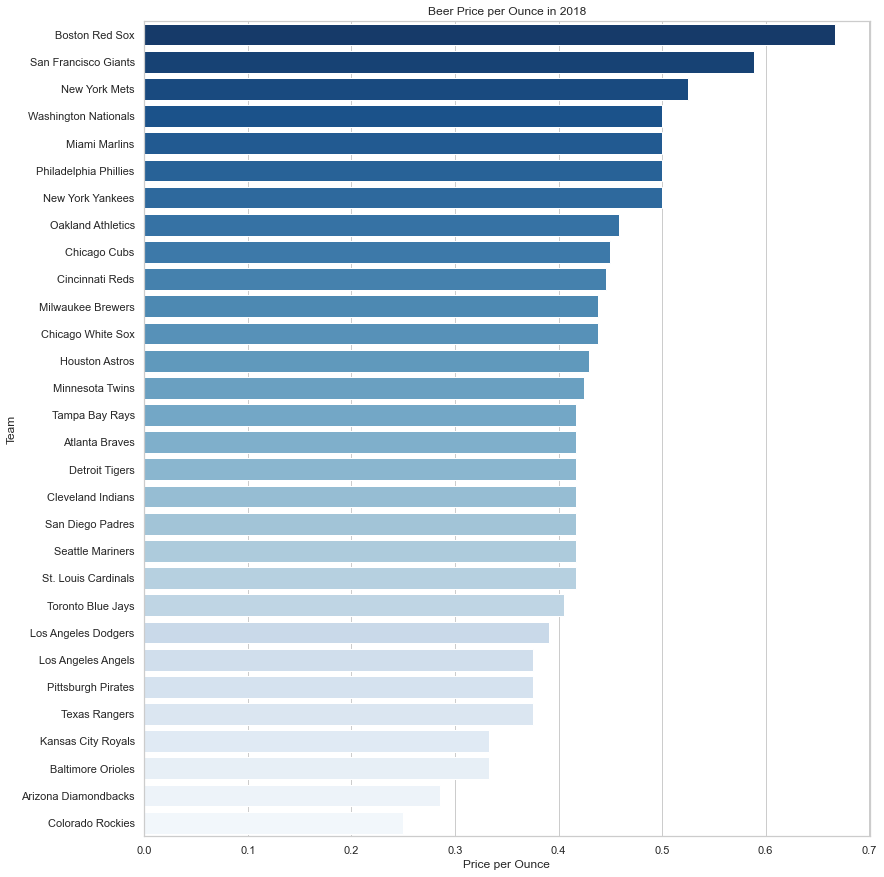

In [92]:
# Set the theme
sns.set_theme(style="whitegrid")

#Set the figure size
f, ax = plt.subplots(figsize=(13, 15))

# Reorder the dataset
Beer_2018_order_ounce = Beer_2018.sort_values(['Rounded_price_per_ounce'], ascending=False).reset_index(drop=True)

# Barplot created
ax = sns.barplot(x="Rounded_price_per_ounce", y="Team", data=Beer_2018_order_ounce, orient="h", palette="Blues_r").set(title="Beer Price per Ounce in 2018")

# Rename the x-axis label
plt.xlabel('Price per Ounce')

# Display barplot
plt.show()

In [93]:
# Finding the mean and median of beer price per ounce in 2018
mean_2018_price_ounce = Beer_2018['Rounded_price_per_ounce'].mean()
median_2018_price_ounce = Beer_2018['Rounded_price_per_ounce'].median()

# Printing the mean and median
print(f'Mean: {mean_2018_price_ounce}')
print(f'Median: {median_2018_price_ounce}')

Mean: 0.43023333333333336
Median: 0.417


In [94]:
# Exporting clean dataset to a CSV file
updated_mlb_beer.to_csv('Resources/clean_mlb_beer.csv', index = False)